In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, train_test_split

In [2]:
df = pd.read_csv("Dataset\\Engineered\\covid19ind_Engineered.csv")

df.head()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/2/2020,2,0,0,2,2,0,0,2,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0
1,3/3/2020,0,0,0,0,2,0,0,2,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1.0
2,3/4/2020,0,0,0,0,2,0,0,2,0.00,0.01,0.0,0.0,0.0,0.0,1.0,1.0
3,3/5/2020,0,0,0,0,2,0,0,2,0.00,0.01,0.0,0.0,0.0,0.0,1.0,1.0
4,3/6/2020,2,0,0,2,4,0,0,4,0.01,0.02,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         392 non-null    object 
 1   New Cases                    392 non-null    int64  
 2   New Deaths                   392 non-null    int64  
 3   New Recovered                392 non-null    int64  
 4   New Active Cases             392 non-null    int64  
 5   Total Cases                  392 non-null    int64  
 6   Total Deaths                 392 non-null    int64  
 7   Total Recovered              392 non-null    int64  
 8   Total Active Cases           392 non-null    int64  
 9   New Cases per Million        392 non-null    float64
 10  Total Cases per Million      392 non-null    float64
 11  New Deaths per Million       392 non-null    float64
 12  Total Deaths per Million     392 non-null    float64
 13  Case Fatality Rate  

In [4]:
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
count,392.000000,392.000000,392.000000,392.000000,3.920000e+02,392.000000,3.920000e+02,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3816.543367,103.186224,3396.428571,316.928571,4.144783e+05,12652.413265,3.389658e+05,62860.186224,14.392066,1562.975051,0.389133,47.711531,4.413673,58.328954,1.028010,1.083036
std,3430.093911,80.295512,3214.845931,1174.652931,4.594122e+05,12251.868637,3.977868e+05,52449.657703,12.934981,1732.418023,0.302803,46.201332,1.987346,29.291299,0.379358,0.617203
min,0.000000,0.000000,0.000000,-5003.000000,2.000000e+00,0.000000,0.000000e+00,2.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,927.250000,40.750000,501.000000,1.500000,3.182125e+04,1875.000000,1.080250e+04,19143.750000,3.497500,119.992500,0.150000,7.070000,2.970000,33.945000,0.900000,0.830000
50%,3268.000000,88.000000,2780.000000,266.500000,2.199525e+05,8782.000000,1.567075e+05,53742.000000,12.325000,829.430000,0.330000,33.115000,3.785000,72.150000,1.000000,1.000000
75%,5776.000000,142.750000,5127.250000,667.250000,6.666420e+05,19931.250000,5.430792e+05,103631.500000,21.782500,2513.867500,0.542500,75.162500,5.302500,82.250000,1.130000,1.200000
max,14518.000000,476.000000,13038.000000,5279.000000,1.496085e+06,40449.000000,1.331400e+06,176672.000000,54.750000,5641.650000,1.790000,152.530000,9.500000,88.990000,6.500000,6.670000


In [5]:
df["Date"] = pd.to_datetime(df["Date"])

df.head()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-02,2,0,0,2,2,0,0,2,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-03,0,0,0,0,2,0,0,2,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1.0
2,2020-03-04,0,0,0,0,2,0,0,2,0.00,0.01,0.0,0.0,0.0,0.0,1.0,1.0
3,2020-03-05,0,0,0,0,2,0,0,2,0.00,0.01,0.0,0.0,0.0,0.0,1.0,1.0
4,2020-03-06,2,0,0,2,4,0,0,4,0.01,0.02,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         392 non-null    datetime64[ns]
 1   New Cases                    392 non-null    int64         
 2   New Deaths                   392 non-null    int64         
 3   New Recovered                392 non-null    int64         
 4   New Active Cases             392 non-null    int64         
 5   Total Cases                  392 non-null    int64         
 6   Total Deaths                 392 non-null    int64         
 7   Total Recovered              392 non-null    int64         
 8   Total Active Cases           392 non-null    int64         
 9   New Cases per Million        392 non-null    float64       
 10  Total Cases per Million      392 non-null    float64       
 11  New Deaths per Million       392 non-null    

In [7]:
df = df.drop(columns=df.columns[5:])

df.head()

,Date,New Cases,New Deaths,New Recovered,New Active Cases
0,2020-03-02,2,0,0,2
1,2020-03-03,0,0,0,0
2,2020-03-04,0,0,0,0
3,2020-03-05,0,0,0,0
4,2020-03-06,2,0,0,2


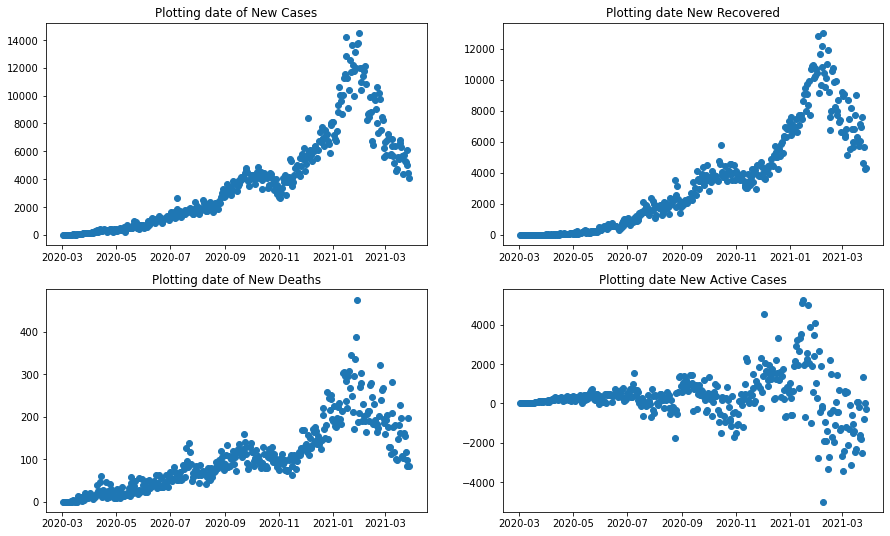

In [8]:
fig, ax = plt.subplots(figsize=(15,9), nrows=2, ncols=2)

for i in range(2):
    ax[i, 0].plot_date(df["Date"], df[df.columns[1:3][i]])
    ax[i, 0].set_title(f"Plotting date of {df.columns[1:3][i]}")
    
    ax[i, 1].plot_date(df["Date"], df[df.columns[3:5][i]])
    ax[i, 1].set_title(f"Plotting date {df.columns[3:5][i]}")
    
plt.show()

# Modelling

In [9]:
# Transform the data

df["Date_Ordinal"] = df["Date"].map(dt.datetime.toordinal)

df.head()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Date_Ordinal
0,2020-03-02,2,0,0,2,737486
1,2020-03-03,0,0,0,0,737487
2,2020-03-04,0,0,0,0,737488
3,2020-03-05,0,0,0,0,737489
4,2020-03-06,2,0,0,2,737490


In [29]:
# Prepare the data

X = df[["Date_Ordinal"]]
Y = df.drop(columns=["Date", "Date_Ordinal"])

print(X.head(), "\n")
print(Y.columns)

   Date_Ordinal
0        737486
1        737487
2        737488
3        737489
4        737490 

Index(['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases'], dtype='object')


In [11]:
# Train Test Split
# Dependent variable is New Cases

X_train, X_test, y_train, y_test = train_test_split(X, Y[Y.columns[0]], test_size=0.3, random_state=42)

linear_regression = LinearRegression()
svr = SVR()
random_forest = RandomForestRegressor()

linear_regression.fit(X_train, y_train)
svr.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

print(f"Error of linear regression {linear_regression.score(X_test, y_test)}")
print(f"Error of support vector regressor {svr.score(X_test, y_test)}")
print(f"Error of random forest regressor {random_forest.score(X_test, y_test)}")

Error of linear regression 0.7854412045769987
Error of support vector regressor 0.03859324456996349
Error of random forest regressor 0.9629087605865915


In [12]:
# Train Test Split
# Dependent variable is New Deaths

X_train, X_test, y_train, y_test = train_test_split(X, Y[Y.columns[1]], test_size=0.3, random_state=42)

linear_regression = LinearRegression()
svr = SVR()
random_forest = RandomForestRegressor()

linear_regression.fit(X_train, y_train)
svr.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

print(f"Error of linear regression {linear_regression.score(X_test, y_test)}")
print(f"Error of support vector regressor {svr.score(X_test, y_test)}")
print(f"Error of random forest regressor {random_forest.score(X_test, y_test)}")

Error of linear regression 0.6553994280342906
Error of support vector regressor 0.6068326879844127
Error of random forest regressor 0.8796513561991175


In [13]:
# Train Test Split
# Dependent variable is New Recovered

X_train, X_test, y_train, y_test = train_test_split(X, Y[Y.columns[2]], test_size=0.3, random_state=42)

linear_regression = LinearRegression()
svr = SVR()
random_forest = RandomForestRegressor()

linear_regression.fit(X_train, y_train)
svr.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

print(f"Error of linear regression {linear_regression.score(X_test, y_test)}")
print(f"Error of support vector regressor {svr.score(X_test, y_test)}")
print(f"Error of random forest regressor {random_forest.score(X_test, y_test)}")

Error of linear regression 0.8459123725058199
Error of support vector regressor 0.039485276066449804
Error of random forest regressor 0.9674867154397384


In [14]:
# Train Test Split
# Dependent variable is New Active Cases

X_train, X_test, y_train, y_test = train_test_split(X, Y[Y.columns[3]], test_size=0.3, random_state=42)

linear_regression = LinearRegression()
svr = SVR()
random_forest = RandomForestRegressor()

linear_regression.fit(X_train, y_train)
svr.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

print(f"Error of linear regression {linear_regression.score(X_test, y_test)}")
print(f"Error of support vector regressor {svr.score(X_test, y_test)}")
print(f"Error of random forest regressor {random_forest.score(X_test, y_test)}")

Error of linear regression -0.0696154883571154
Error of support vector regressor -0.008268743995563543
Error of random forest regressor 0.1852954247471731


In [22]:
# Using KFOLD
# Dependent variable is New Cases

N = 5
skf = StratifiedKFold(n_splits=N, shuffle=True, random_state=42)
random_forest = RandomForestRegressor()
svr = SVR()
linear_regression = LinearRegression()

random_forest_error = np.array([])
svr_error = np.array([])
linear_regression_error = np.array([])

for fold, (trn_idx, val_idx) in enumerate(skf.split(X, Y[Y.columns[0]]), 1):
    print(f"Fold {fold}\n-------------------------------------")
    
    linear_regression.fit(X.iloc[trn_idx], Y[Y.columns[0]][trn_idx])
    svr.fit(X.iloc[trn_idx], Y[Y.columns[0]][trn_idx])
    random_forest.fit(X.iloc[trn_idx], Y[Y.columns[0]][trn_idx])
    
    print(f"Fold {fold}, random forest regresion error : {random_forest.score(X.iloc[val_idx], Y[Y.columns[0]][val_idx])}")
    random_forest_error = np.append(random_forest_error, random_forest.score(X.iloc[val_idx], Y[Y.columns[0]][val_idx]))
    print(f"Fold {fold}, linear regression error : {linear_regression.score(X.iloc[val_idx], Y[Y.columns[0]][val_idx])}")
    linear_regression_error = np.append(linear_regression_error, linear_regression.score(X.iloc[val_idx], Y[Y.columns[0]][val_idx]))
    print(f"Fold {fold}, support vector regressor error : {svr.score(X.iloc[val_idx], Y[Y.columns[0]][val_idx])}\n-------------------------------------")
    svr_error = np.append(svr_error, svr.score(X.iloc[val_idx], Y[Y.columns[0]][val_idx]))

print(f"Mean linear regression error : {random_forest_error.mean()}")
print(f"Mean svr error : {svr_error.mean()}")
print(f"Mean linear regression error : {linear_regression_error.mean()}")

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1
-------------------------------------
Fold 1, random forest regresion error : 0.969552216920681
Fold 1, linear regression error : 0.7397979273420756
Fold 1, support vector regressor error : 0.007243485842849839
-------------------------------------
Fold 2
-------------------------------------
Fold 2, random forest regresion error : 0.9609143021452117
Fold 2, linear regression error : 0.7462580726544233
Fold 2, support vector regressor error : 0.011525957310768331
-------------------------------------
Fold 3
-------------------------------------
Fold 3, random forest regresion error : 0.9677510300403829
Fold 3, linear regression error : 0.7691115262356839
Fold 3, support vector regressor error : 0.02231638237698874
-------------------------------------
Fold 4
-------------------------------------
Fold 4, random forest regresion error : 0.9813499583407584
Fold 4, linear regression error : 0.769519959701313
Fold 4, support vector regressor error : 0.01759505304785669
--------------

In [23]:
# Using KFOLD
# Dependent variable is New Deaths

N = 5
skf = StratifiedKFold(n_splits=N, shuffle=True, random_state=42)
random_forest = RandomForestRegressor()
svr = SVR()
linear_regression = LinearRegression()

random_forest_error = np.array([])
svr_error = np.array([])
linear_regression_error = np.array([])

for fold, (trn_idx, val_idx) in enumerate(skf.split(X, Y[Y.columns[1]]), 1):
    print(f"Fold {fold}\n-------------------------------------")
    
    linear_regression.fit(X.iloc[trn_idx], Y[Y.columns[1]][trn_idx])
    svr.fit(X.iloc[trn_idx], Y[Y.columns[1]][trn_idx])
    random_forest.fit(X.iloc[trn_idx], Y[Y.columns[1]][trn_idx])
    
    print(f"Fold {fold}, random forest regresion error : {random_forest.score(X.iloc[val_idx], Y[Y.columns[1]][val_idx])}")
    random_forest_error = np.append(random_forest_error, random_forest.score(X.iloc[val_idx], Y[Y.columns[1]][val_idx]))
    print(f"Fold {fold}, linear regression error : {linear_regression.score(X.iloc[val_idx], Y[Y.columns[1]][val_idx])}")
    linear_regression_error = np.append(linear_regression_error, linear_regression.score(X.iloc[val_idx], Y[Y.columns[1]][val_idx]))
    print(f"Fold {fold}, support vector regressor error : {svr.score(X.iloc[val_idx], Y[Y.columns[1]][val_idx])}\n-------------------------------------")
    svr_error = np.append(svr_error, svr.score(X.iloc[val_idx], Y[Y.columns[1]][val_idx]))

print(f"Mean linear regression error : {random_forest_error.mean()}")
print(f"Mean svr error : {svr_error.mean()}")
print(f"Mean linear regression error : {linear_regression_error.mean()}")

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1
-------------------------------------
Fold 1, random forest regresion error : 0.8452075810825972
Fold 1, linear regression error : 0.6819926748463093
Fold 1, support vector regressor error : 0.5698451457161826
-------------------------------------
Fold 2
-------------------------------------
Fold 2, random forest regresion error : 0.8831085351612198
Fold 2, linear regression error : 0.6246185571932963
Fold 2, support vector regressor error : 0.5084231213420257
-------------------------------------
Fold 3
-------------------------------------
Fold 3, random forest regresion error : 0.8651456797630553
Fold 3, linear regression error : 0.7744845621976986
Fold 3, support vector regressor error : 0.6501418940716059
-------------------------------------
Fold 4
-------------------------------------
Fold 4, random forest regresion error : 0.8721870715409115
Fold 4, linear regression error : 0.7560895231405153
Fold 4, support vector regressor error : 0.5548244494273395
------------------

In [24]:
# Using KFold
# Dependent variable is New Recovered

N = 5
skf = StratifiedKFold(n_splits=N, shuffle=True, random_state=42)
random_forest = RandomForestRegressor()
svr = SVR()
linear_regression = LinearRegression()

random_forest_error = np.array([])
svr_error = np.array([])
linear_regression_error = np.array([])

for fold, (trn_idx, val_idx) in enumerate(skf.split(X, Y[Y.columns[2]]), 1):
    print(f"Fold {fold}\n-------------------------------------")
    
    linear_regression.fit(X.iloc[trn_idx], Y[Y.columns[2]][trn_idx])
    svr.fit(X.iloc[trn_idx], Y[Y.columns[2]][trn_idx])
    random_forest.fit(X.iloc[trn_idx], Y[Y.columns[2]][trn_idx])
    
    print(f"Fold {fold}, random forest regresion error : {random_forest.score(X.iloc[val_idx], Y[Y.columns[2]][val_idx])}")
    random_forest_error = np.append(random_forest_error, random_forest.score(X.iloc[val_idx], Y[Y.columns[2]][val_idx]))
    print(f"Fold {fold}, linear regression error : {linear_regression.score(X.iloc[val_idx], Y[Y.columns[2]][val_idx])}")
    linear_regression_error = np.append(linear_regression_error, linear_regression.score(X.iloc[val_idx], Y[Y.columns[2]][val_idx]))
    print(f"Fold {fold}, support vector regressor error : {svr.score(X.iloc[val_idx], Y[Y.columns[2]][val_idx])}\n-------------------------------------")
    svr_error = np.append(svr_error, svr.score(X.iloc[val_idx], Y[Y.columns[2]][val_idx]))

print(f"Mean linear regression error : {random_forest_error.mean()}")
print(f"Mean svr error : {svr_error.mean()}")
print(f"Mean linear regression error : {linear_regression_error.mean()}")

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1
-------------------------------------
Fold 1, random forest regresion error : 0.9597793472442243
Fold 1, linear regression error : 0.8282388181800362
Fold 1, support vector regressor error : 0.0012095026386954588
-------------------------------------
Fold 2
-------------------------------------
Fold 2, random forest regresion error : 0.9630246707112649
Fold 2, linear regression error : 0.813727508403966
Fold 2, support vector regressor error : 0.0072091383186622116
-------------------------------------
Fold 3
-------------------------------------
Fold 3, random forest regresion error : 0.9675612695853191
Fold 3, linear regression error : 0.8125984212269044
Fold 3, support vector regressor error : 0.015651336894153545
-------------------------------------
Fold 4
-------------------------------------
Fold 4, random forest regresion error : 0.9307016831055577
Fold 4, linear regression error : 0.7925716777762204
Fold 4, support vector regressor error : -0.0047629747321966676
-------

In [25]:
# Using KFold
# Dependent variable is New Active Cases

N = 5
skf = StratifiedKFold(n_splits=N, shuffle=True, random_state=42)
random_forest = RandomForestRegressor()
svr = SVR()
linear_regression = LinearRegression()

random_forest_error = np.array([])
svr_error = np.array([])
linear_regression_error = np.array([])

for fold, (trn_idx, val_idx) in enumerate(skf.split(X, Y[Y.columns[3]]), 1):
    print(f"Fold {fold}\n-------------------------------------")
    
    linear_regression.fit(X.iloc[trn_idx], Y[Y.columns[3]][trn_idx])
    svr.fit(X.iloc[trn_idx], Y[Y.columns[3]][trn_idx])
    random_forest.fit(X.iloc[trn_idx], Y[Y.columns[3]][trn_idx])
    
    print(f"Fold {fold}, random forest regresion error : {random_forest.score(X.iloc[val_idx], Y[Y.columns[3]][val_idx])}")
    random_forest_error = np.append(random_forest_error, random_forest.score(X.iloc[val_idx], Y[Y.columns[3]][val_idx]))
    print(f"Fold {fold}, linear regression error : {linear_regression.score(X.iloc[val_idx], Y[Y.columns[3]][val_idx])}")
    linear_regression_error = np.append(linear_regression_error, linear_regression.score(X.iloc[val_idx], Y[Y.columns[3]][val_idx]))
    print(f"Fold {fold}, support vector regressor error : {svr.score(X.iloc[val_idx], Y[Y.columns[3]][val_idx])}\n-------------------------------------")
    svr_error = np.append(svr_error, svr.score(X.iloc[val_idx], Y[Y.columns[3]][val_idx]))

print(f"Mean linear regression error : {random_forest_error.mean()}")
print(f"Mean svr error : {svr_error.mean()}")
print(f"Mean linear regression error : {linear_regression_error.mean()}")

C:\Users\Bina Umat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1
-------------------------------------
Fold 1, random forest regresion error : 0.2989402527767273
Fold 1, linear regression error : -0.009711869747846658
Fold 1, support vector regressor error : 0.004984776669175184
-------------------------------------
Fold 2
-------------------------------------
Fold 2, random forest regresion error : 0.614274064299204
Fold 2, linear regression error : -0.006571034154429833
Fold 2, support vector regressor error : 0.003994802051148216
-------------------------------------
Fold 3
-------------------------------------
Fold 3, random forest regresion error : 0.4126740660364905
Fold 3, linear regression error : -0.009612367033130509
Fold 3, support vector regressor error : -0.00952721124866307
-------------------------------------
Fold 4
-------------------------------------
Fold 4, random forest regresion error : 0.4861373608038845
Fold 4, linear regression error : -0.00429337776494787
Fold 4, support vector regressor error : -0.002991641416072443

# Conclusion

## Using Train Test Split

### New Cases
- The best model for New Cases using train test split is Support Vector Machine

### New Deaths
- The best model for New Deaths using train test split is Support Vector Machine

### New Recovered
- The best model for New Recovered using train test split is Support Vector Machine

### New Active Cases
- The best model for New Active Cases using train test split is Support Vector Machine

## Using KFold

### New Cases
- The best model for New Cases using KFold is Support Vector Machine

### New Deaths
- The best model for New Deaths using KFold is Support Vector Machine

### New Recovered
- The best model for New Recovered using KFold is Support Vector Machine

### New Active Cases
- The best model for New Active Cases using KFold is Support Vector Machine

## The best model for this data is Support Vector Machine 

# Plotting Using Support Vector Machine

### Plotting New Cases Feature

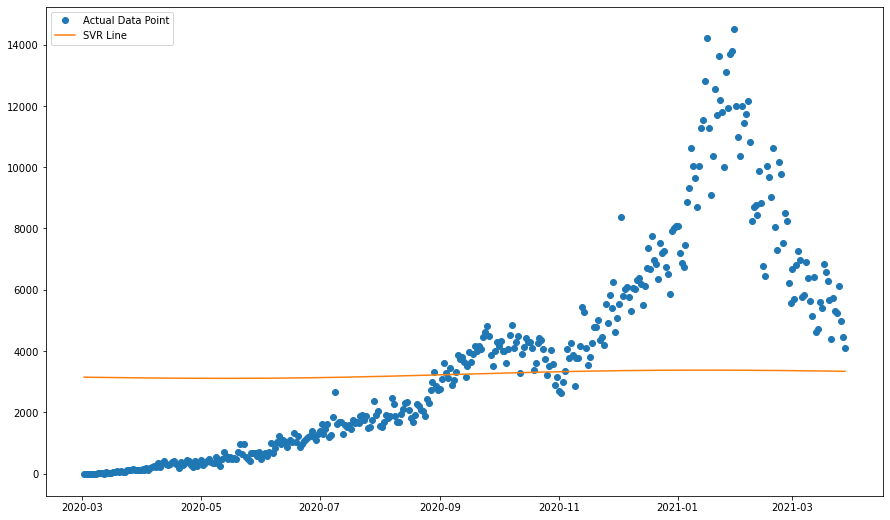

In [52]:
svr.fit(df[["Date_Ordinal"]], df["New Cases"])

fig, ax = plt.subplots(figsize=(15, 9))

plt.plot_date(df["Date"], df["New Cases"], label="Actual Data Point")
plt.plot(df["Date"], svr.predict(df[["Date_Ordinal"]]), label="SVR Line")

plt.legend(loc='upper left')

plt.show()

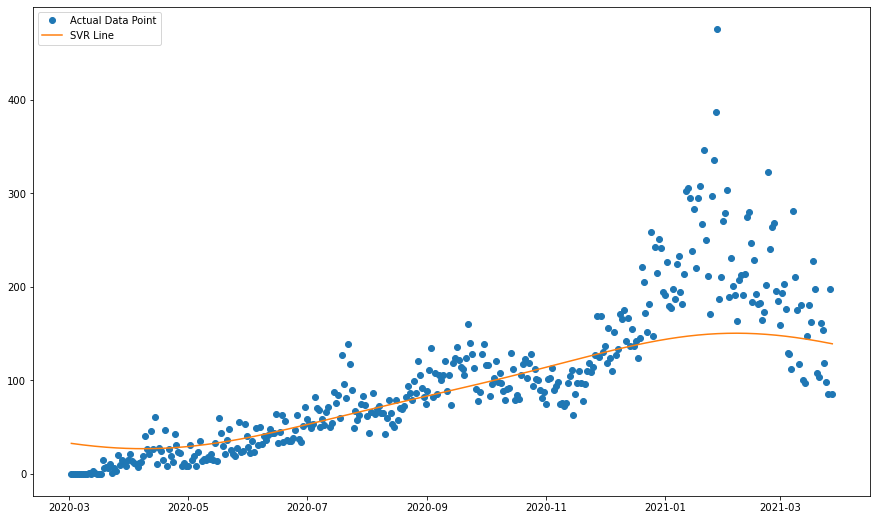

In [54]:
svr.fit(df[["Date_Ordinal"]], df["New Deaths"])

fig, ax = plt.subplots(figsize=(15, 9))

plt.plot_date(df["Date"], df["New Deaths"], label="Actual Data Point")
plt.plot(df["Date"], svr.predict(df[["Date_Ordinal"]]), label="SVR Line")

plt.legend(loc='upper left')

plt.show()

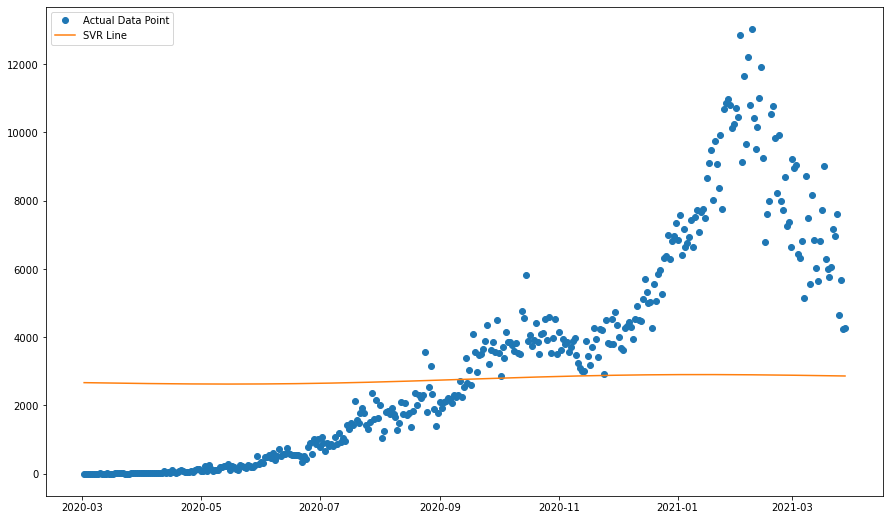

In [55]:
svr.fit(df[["Date_Ordinal"]], df["New Recovered"])

fig, ax = plt.subplots(figsize=(15, 9))

plt.plot_date(df["Date"], df["New Recovered"], label="Actual Data Point")
plt.plot(df["Date"], svr.predict(df[["Date_Ordinal"]]), label="SVR Line")

plt.legend(loc='upper left')

plt.show()

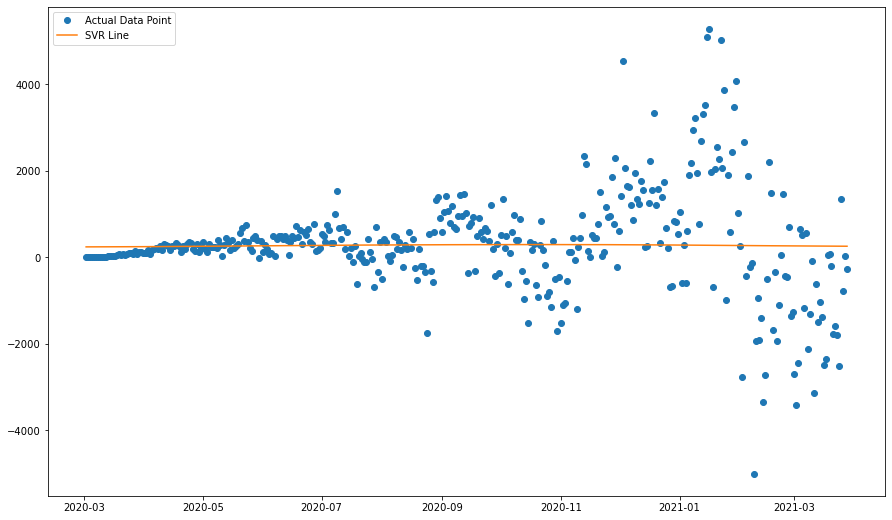

In [56]:
svr.fit(df[["Date_Ordinal"]], df["New Active Cases"])

fig, ax = plt.subplots(figsize=(15, 9))

plt.plot_date(df["Date"], df["New Active Cases"], label="Actual Data Point")
plt.plot(df["Date"], svr.predict(df[["Date_Ordinal"]]), label="SVR Line")

plt.legend(loc='upper left')

plt.show()